In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'font.size': 24, 'text.usetex': True})

torch.set_default_device('cuda')
torch.set_default_dtype(torch.float64)
print(f'Using CUDA device: {torch.cuda.get_device_name()}')

Using CUDA device: NVIDIA GeForce RTX 4070 Laptop GPU


In [2]:
# Logarithmic spacing for delta from 10^-5 to 10^-1
delta_values = np.logspace(-3, -1, 17)
N_values = np.array([16, 32, 48, 64, 96, 128, 160, 192, 224, 256, 320, 384, 448, 512, 640, 768, 896, 1024])
print(f'N values: {N_values}')
print(f'Delta values: {delta_values}')
print(f'Number of delta values: {len(delta_values)}')

N values: [  16   32   48   64   96  128  160  192  224  256  320  384  448  512
  640  768  896 1024]
Delta values: [0.001      0.00133352 0.00177828 0.00237137 0.00316228 0.00421697
 0.00562341 0.00749894 0.01       0.01333521 0.01778279 0.02371374
 0.03162278 0.04216965 0.05623413 0.07498942 0.1       ]
Number of delta values: 17


In [3]:
def compute_max_eigenvalue(N, delta):
    """
    Compute the maximum eigenvalue of the matrix constructed from sinc function.
    
    Args:
        N: Matrix dimension (eigenvector will be (N+1)-dimensional)
        delta: Delta parameter
    
    Returns:
        Maximum eigenvalue
    """
    # Construct matrix
    mat = np.fromfunction(lambda j, k: 2 * delta * np.sinc((j - k) * 2 * delta), (N+1, N+1))
    np.fill_diagonal(mat, 2 * delta)
    
    # Compute eigenvalues
    eigvals = np.linalg.eigvalsh(mat)
    
    # Return maximum eigenvalue
    return np.max(eigvals)

In [4]:
# Compute (1 - lambda_max) for all combinations of N and delta
results = {}
epsilon_min_threshold = 1e-12  # Stop if epsilon < 1e-12 (numerical precision limit)
epsilon_max_threshold = 1e-1   # Ignore if epsilon > 1e-1 (too large)

for delta in delta_values:
    one_minus_lambda_max = []
    valid_N_values = []
    
    for N in N_values:
        lambda_max = compute_max_eigenvalue(N, delta)
        one_minus = 1.0 - lambda_max
        print(f'N={N:4d}, δ={delta:.5e}: λ_max={lambda_max:.10f}, (1-λ_max)={one_minus:.10e}')
        
        # Only keep values in valid range [1e-12, 1e-1]
        if epsilon_min_threshold <= one_minus <= epsilon_max_threshold:
            one_minus_lambda_max.append(one_minus)
            valid_N_values.append(N)
        elif one_minus < epsilon_min_threshold:
            print(f'  -> Epsilon below threshold, skipping remaining N for δ={delta}')
            break

        results[delta] = {'epsilon': one_minus_lambda_max, 'N': valid_N_values}

N=  16, δ=1.00000e-03: λ_max=0.0339892650, (1-λ_max)=9.6601073502e-01
N=  32, δ=1.00000e-03: λ_max=0.0659213400, (1-λ_max)=9.3407866000e-01
N=  48, δ=1.00000e-03: λ_max=0.0977426974, (1-λ_max)=9.0225730256e-01
N=  64, δ=1.00000e-03: λ_max=0.1294003798, (1-λ_max)=8.7059962019e-01
N=  96, δ=1.00000e-03: λ_max=0.1920173557, (1-λ_max)=8.0798264429e-01
N= 128, δ=1.00000e-03: λ_max=0.2533700971, (1-λ_max)=7.4662990291e-01
N= 160, δ=1.00000e-03: λ_max=0.3130819591, (1-λ_max)=6.8691804086e-01
N= 192, δ=1.00000e-03: λ_max=0.3708089247, (1-λ_max)=6.2919107532e-01
N= 224, δ=1.00000e-03: λ_max=0.4262456543, (1-λ_max)=5.7375434568e-01
N= 256, δ=1.00000e-03: λ_max=0.4791303063, (1-λ_max)=5.2086969374e-01
N= 320, δ=1.00000e-03: λ_max=0.5764328330, (1-λ_max)=4.2356716695e-01
N= 384, δ=1.00000e-03: λ_max=0.6615874020, (1-λ_max)=3.3841259804e-01
N= 448, δ=1.00000e-03: λ_max=0.7342346360, (1-λ_max)=2.6576536397e-01
N= 512, δ=1.00000e-03: λ_max=0.7947014745, (1-λ_max)=2.0529852551e-01
N= 640, δ=1.00000e-0

Linear fit: d = a * log(epsilon^{-1}) + b for each delta

       Delta            a            b       R²        MAD
------------------------------------------------------------
 1.00000e-03   190.632243      243.005   0.9998      1.015
 1.33352e-03   138.575608      193.400   0.9992      5.214
 1.77828e-03   100.226085      157.733   0.9993      5.386
 2.37137e-03    72.684872      131.199   0.9996      4.167
 3.16228e-03    53.730643      101.466   0.9995      5.259
 4.21697e-03    39.772403       78.845   0.9996      4.933
 5.62341e-03    29.766326       60.090   0.9997      2.979
 7.49894e-03    22.212514       45.881   0.9997      2.060
 1.00000e-02    16.575621       35.792   0.9998      1.206
 1.33352e-02    12.491462       25.732   0.9998      1.014
 1.77828e-02     9.344388       19.050   0.9998      0.896
 2.37137e-02     7.019210       13.715   0.9998      0.767
 3.16228e-02     5.244200       10.495   0.9999      0.340
 4.21697e-02     3.969314        6.935   0.9995      0.

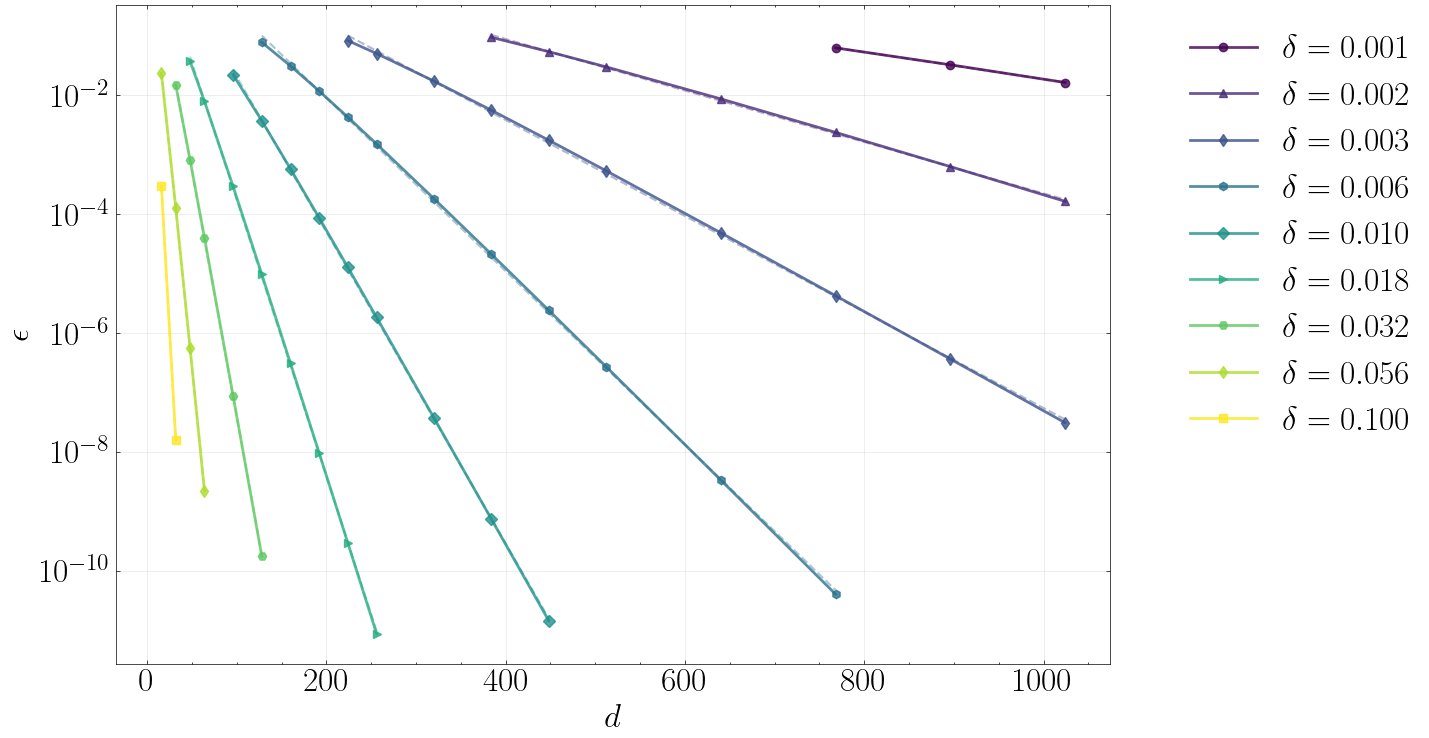

In [5]:
# Plot epsilon vs d with linear fit d ~ log(epsilon^{-1}) for each delta
plt.figure(figsize=(15, 8))

markers = ['o', 's', '^', 'v', 'd', 'p', 'h', '*', 'D', '<', '>', 'p', 'H', 'X', 'd', 'o', 's', '^']
colors = plt.cm.viridis(np.linspace(0, 1, len(delta_values)))

print("Linear fit: d = a * log(epsilon^{-1}) + b for each delta\n")
print(f"{'Delta':>12s} {'a':>12s} {'b':>12s} {'R²':>8s} {'MAD':>10s}")
print("-" * 60)

# Store fit results
fit_results = {'delta': [], 'a': [], 'b': [], 'r2': [], 'mad': []}

# Plot empirical data and linear fits
for i, delta in enumerate(delta_values):
    if delta in results and len(results[delta]['epsilon']) > 1:
        valid_eps = results[delta]['epsilon']
        valid_N = results[delta]['N']
        
        # Linear fit: d = a * log(epsilon^{-1}) + b (unweighted)
        x_fit = np.log(1.0 / np.array(valid_eps))  # log(epsilon^{-1})
        y_fit = np.array(valid_N)  # d
        
        # Perform unweighted linear regression
        coeffs = np.polyfit(x_fit, y_fit, 1)
        a, b = coeffs[0], coeffs[1]
        
        # Compute R² and MAD
        y_pred = a * x_fit + b
        residuals = y_fit - y_pred
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
        r_squared = 1 - (ss_res / ss_tot) if ss_tot > 0 else 0
        mad = np.median(np.abs(residuals))
        
        # Store results
        fit_results['delta'].append(delta)
        fit_results['a'].append(a)
        fit_results['b'].append(b)
        fit_results['r2'].append(r_squared)
        fit_results['mad'].append(mad)
        
        print(f"{delta:12.5e} {a:12.6f} {b:12.3f} {r_squared:8.4f} {mad:10.3f}")
        
        # Plot empirical data (show every 2nd for clarity)
        if i % 2 == 0:
            plt.plot(valid_N, valid_eps,
                     marker=markers[i % len(markers)],
                     color=colors[i],
                     linewidth=2,
                     markersize=6,
                     label=f'$\\delta={delta:.3f}$',
                     alpha=0.8)
            
            # Plot fitted curve: d = a * log(epsilon^{-1}) + b
            # => epsilon = exp(-(d - b) / a)
            d_range = np.linspace(min(valid_N), max(valid_N), 100)
            eps_fitted = []
            for d in d_range:
                if a > 0:
                    log_inv_eps = (d - b) / a
                    eps = np.exp(-log_inv_eps) if log_inv_eps > 0 else 1.0
                else:
                    eps = 1.0
                eps_fitted.append(eps)
            
            plt.plot(d_range, eps_fitted,
                     color=colors[i],
                     linestyle='--',
                     linewidth=1.5,
                     alpha=0.4)

plt.xlabel(r'$d$')
plt.ylabel(r'$\epsilon$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('eigenvalue_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()



Power law fit (free exponent): a = 0.170 * delta^(-1.000)
This suggests: d ≈ 0.170 * delta^(-1.000) * log(epsilon^(-1)) + b
R² = 0.987880


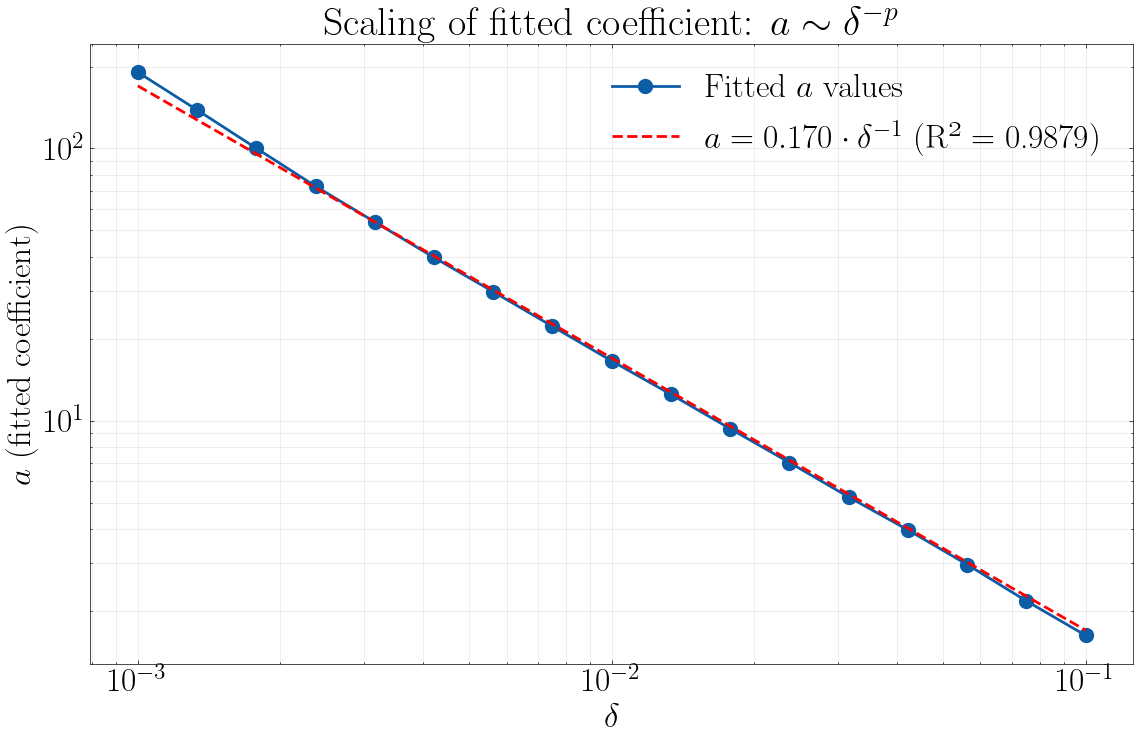

In [9]:
# Plot fitted coefficient 'a' vs delta to determine scaling relationship
plt.figure(figsize=(12, 8))

delta_arr = np.array(fit_results['delta'])
a_arr = np.array(fit_results['a'])

# Plot on log-log scale to see power law relationship
plt.loglog(delta_arr, a_arr, 'o-', markersize=10, linewidth=2, label='Fitted $a$ values')

# Fit power law: a = C * delta^(-1) (fixed exponent -1)
# This means: a * delta = C
p = 1.0  # Fixed exponent
C = np.mean(a_arr * delta_arr)  # Simple mean of a * delta

# Compute R² for fixed exponent fit
a_pred = C * delta_arr**(-1)
ss_res = np.sum((a_arr - a_pred)**2)
ss_tot = np.sum((a_arr - np.mean(a_arr))**2)
r_squared = 1 - (ss_res / ss_tot) if ss_tot > 0 else 0

# Plot fitted power law
delta_theory = np.linspace(min(delta_arr), max(delta_arr), 100)
a_theory = C * delta_theory**(-1)
plt.loglog(delta_theory, a_theory, '--', linewidth=2, color='red', 
           label=f'$a = {C:.3f} \\cdot \\delta^{{-1}}$ (R² = {r_squared:.4f})')

plt.xlabel(r'$\delta$')
plt.ylabel(r'$a$ (fitted coefficient)')
plt.grid(True, alpha=0.3, which='both')
plt.legend()
plt.title(r'Scaling of fitted coefficient: $a \sim \delta^{-p}$')
plt.tight_layout()
print(f"\nPower law fit (free exponent): a = {C:.3f} * delta^(-{p:.3f})")
print(f"This suggests: d ≈ {C:.3f} * delta^(-{p:.3f}) * log(epsilon^(-1)) + b")
print(f"R² = {r_squared:.6f}")
plt.show()